In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning) #remove warning

In [2]:
def load_dataset(path_to_file):
    df=pd.read_csv(path_to_file)
    return df

In [3]:
def standardize(df):
    scaler=StandardScaler()
    df_std=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
    df_std[df.columns[-1]]=df[df.columns[-1]]
    return df_std

In [4]:
def train_test(df):
    X=df.drop(df.columns[-1],axis=1)
    y=df[df.columns[-1]]
    XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=42)
    return([XTrain,XTest,yTrain,yTest])

In [5]:
def knn_classifier(k,XTrain,yTrain,XTest):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(XTrain, yTrain)
    yPred = knn.predict(XTest)
    return yPred

In [6]:
def percentage_accuracy(yPred,yTest):
    return(accuracy_score(yTest, yPred))

In [7]:
def confusion_matrixp(yPred,yTest):
    return(confusion_matrix(yTest,yPred))

In [8]:
def naive_bayes_classifier(XTrain,yTrain,XTest):
    gnb = GaussianNB()
    gnb.fit(XTrain, yTrain)
    yPred = gnb.predict(XTest)
    return yPred

In [9]:
def pca(df,n):
    x=df.drop(df.columns[-1],axis=1)
    pca = PCA(n_components=n)
    pComps = pca.fit_transform(x)
    pDf = pd.DataFrame(data = pComps)
    pDf[df.columns[-1]]=df[df.columns[-1]]
    return pDf

In [10]:
def bayes(X,y,yName):
     XTrain, XTest, YTrain, YTest =train_test_split(X,y, test_size=0.3, random_state=42,shuffle=True)
     XTrain0=XTrain[XTrain[yName] == 0]
     XTrain1=XTrain[XTrain[yName] == 1]
     meanXTrain0=XTrain0.mean(axis = 0)
     meanXTrain1=XTrain1.mean(axis = 0)
     covXTrain0=XTrain0.cov()
     covXTrain1=XTrain1.cov()
     YPred=[]
     for i in range(len(XTest)):
         p1=multivariate_normal.pdf(XTest.iloc[i], mean=meanXTrain1,cov= covXTrain1,allow_singular=True)
         p0=multivariate_normal.pdf(XTest.iloc[i], mean=meanXTrain0,cov= covXTrain0,allow_singular=True)
         if(p1>p0):
             YPred.append(1)
         else:
             YPred.append(0)
     return YPred

In [13]:
def main():
    
    #Q1 and Q2
    df=load_dataset("./SteelPlateFaults-2class.csv")

    dfStd=standardize(df)
    dividedData = train_test(dfStd)
    XTrain=dividedData[0]
    XTest=dividedData[1]
    yTrain=dividedData[2]
    yTest=dividedData[3]
    
    yName = 'Z_Scratch'
    X = df
    y = df[yName]
    
    #Xdata=df.drop(df.columns[-1],axis=1)
    #ydata=df[df.columns[-1]] 
    
    k = range(1,22,2)
    accuracies=[]
    confusion=[]
    for i in k:
        print("K = ",i)
        yPredKnn=knn_classifier(i,XTrain,yTrain,XTest)
        print(confusion_matrixp(yPredKnn,yTest))
        confusion.append(confusion_matrixp(yPredKnn,yTest))
        print(percentage_accuracy(yPredKnn,yTest),"\n")
        accuracies.append(percentage_accuracy(yPredKnn,yTest))
      
    yPredBayes = bayes(X,y,yName)
    print("Confusion Matrix by KNN Classifier: \n",sum(confusion)/len(confusion),"\n")
    print("Confusion Matrix by Bayes Classifier: \n",confusion_matrixp(yPredBayes,yTest),"\n")
    print("Accuracy by KNN Classifier:",sum(accuracies)/len(accuracies))
    print("Accuracy by Bayes Classifier:",percentage_accuracy(yPredBayes,yTest))
    
    plt.plot(range(1,22,2),accuracies,color='b')
    plt.xlabel("Value of K")
    plt.ylabel("Accuracy")
    plt.show()
    
    #Q3
    #l=[i for i in range(1,len(df.columns))]
    l = [1,2,3]
    
    for i in l:
        print("####################################### VALUE OF N: ",i,"\n")
        pdf = pca(df,i)
        dfStd=standardize(df)
        dividedData = train_test(dfStd)
        XTrain=dividedData[0]
        XTest=dividedData[1]
        yTrain=dividedData[2]
        yTest=dividedData[3]
    
        yName ='Z_Scratch'
        X = df
        y = df[yName]
    
        #Xdata=df.drop(df.columns[-1],axis=1)
        #ydata=df[df.columns[-1]] 
    
        k = range(1,22,2)
        accuracies=[]
        confusion=[]
        for i in k:
            print("K = ",i)
            yPredKnn=knn_classifier(i,XTrain,yTrain,XTest)
            print(confusion_matrixp(yPredKnn,yTest))
            confusion.append(confusion_matrixp(yPredKnn,yTest))
            print(percentage_accuracy(yPredKnn,yTest),"\n")
            accuracies.append(percentage_accuracy(yPredKnn,yTest))
      
        yPredBayes = bayes(X,y,yName)
        print("Confusion Matrix by KNN Classifier: \n",sum(confusion)/len(confusion),"\n")
        print("Confusion Matrix by Bayes Classifier: \n",confusion_matrixp(yPredBayes,yTest),"\n")
        print("Accuracy by KNN Classifier:",sum(accuracies)/len(accuracies))
        print("Accuracy by Bayes Classifier:",percentage_accuracy(yPredBayes,yTest))
    
        plt.plot(range(1,22,2),accuracies,color='b')
        plt.xlabel("Value of K")
        plt.ylabel("Accuracy")
        plt.show()

K =  1
[[110   1]
 [  1  63]]
0.9885714285714285 

K =  3
[[110   1]
 [  2  62]]
0.9828571428571429 

K =  5
[[110   1]
 [  2  62]]
0.9828571428571429 

K =  7
[[110   1]
 [  2  62]]
0.9828571428571429 

K =  9
[[110   1]
 [  3  61]]
0.9771428571428571 

K =  11
[[110   1]
 [  3  61]]
0.9771428571428571 

K =  13
[[110   1]
 [  2  62]]
0.9828571428571429 

K =  15
[[110   1]
 [  3  61]]
0.9771428571428571 

K =  17
[[109   2]
 [  2  62]]
0.9771428571428571 

K =  19
[[107   4]
 [  2  62]]
0.9657142857142857 

K =  21
[[105   6]
 [  2  62]]
0.9542857142857143 

Confusion Matrix by KNN Classifier: 
 [[109.18181818   1.81818182]
 [  2.18181818  61.81818182]] 

Confusion Matrix by Bayes Classifier: 
 [[88 23]
 [ 3 61]] 

Accuracy by KNN Classifier: 0.9771428571428572
Accuracy by Bayes Classifier: 0.8514285714285714


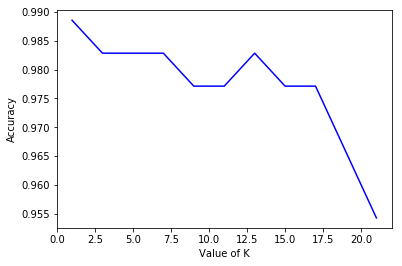

####################################### VALUE OF N:  1 

K =  1
[[110   1]
 [  1  63]]
0.9885714285714285 

K =  3
[[110   1]
 [  2  62]]
0.9828571428571429 

K =  5
[[110   1]
 [  2  62]]
0.9828571428571429 

K =  7
[[110   1]
 [  2  62]]
0.9828571428571429 

K =  9
[[110   1]
 [  3  61]]
0.9771428571428571 

K =  11
[[110   1]
 [  3  61]]
0.9771428571428571 

K =  13
[[110   1]
 [  2  62]]
0.9828571428571429 

K =  15
[[110   1]
 [  3  61]]
0.9771428571428571 

K =  17
[[109   2]
 [  2  62]]
0.9771428571428571 

K =  19
[[107   4]
 [  2  62]]
0.9657142857142857 

K =  21
[[105   6]
 [  2  62]]
0.9542857142857143 

Confusion Matrix by KNN Classifier: 
 [[109.18181818   1.81818182]
 [  2.18181818  61.81818182]] 

Confusion Matrix by Bayes Classifier: 
 [[88 23]
 [ 3 61]] 

Accuracy by KNN Classifier: 0.9771428571428572
Accuracy by Bayes Classifier: 0.8514285714285714


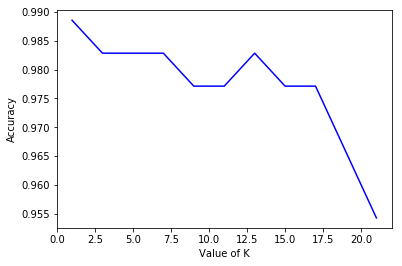

####################################### VALUE OF N:  2 

K =  1
[[110   1]
 [  1  63]]
0.9885714285714285 

K =  3
[[110   1]
 [  2  62]]
0.9828571428571429 

K =  5
[[110   1]
 [  2  62]]
0.9828571428571429 

K =  7
[[110   1]
 [  2  62]]
0.9828571428571429 

K =  9
[[110   1]
 [  3  61]]
0.9771428571428571 

K =  11
[[110   1]
 [  3  61]]
0.9771428571428571 

K =  13
[[110   1]
 [  2  62]]
0.9828571428571429 

K =  15
[[110   1]
 [  3  61]]
0.9771428571428571 

K =  17
[[109   2]
 [  2  62]]
0.9771428571428571 

K =  19
[[107   4]
 [  2  62]]
0.9657142857142857 

K =  21
[[105   6]
 [  2  62]]
0.9542857142857143 

Confusion Matrix by KNN Classifier: 
 [[109.18181818   1.81818182]
 [  2.18181818  61.81818182]] 

Confusion Matrix by Bayes Classifier: 
 [[88 23]
 [ 3 61]] 

Accuracy by KNN Classifier: 0.9771428571428572
Accuracy by Bayes Classifier: 0.8514285714285714


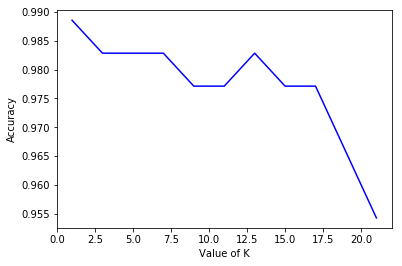

####################################### VALUE OF N:  3 

K =  1
[[110   1]
 [  1  63]]
0.9885714285714285 

K =  3
[[110   1]
 [  2  62]]
0.9828571428571429 

K =  5
[[110   1]
 [  2  62]]
0.9828571428571429 

K =  7
[[110   1]
 [  2  62]]
0.9828571428571429 

K =  9
[[110   1]
 [  3  61]]
0.9771428571428571 

K =  11
[[110   1]
 [  3  61]]
0.9771428571428571 

K =  13
[[110   1]
 [  2  62]]
0.9828571428571429 

K =  15
[[110   1]
 [  3  61]]
0.9771428571428571 

K =  17
[[109   2]
 [  2  62]]
0.9771428571428571 

K =  19
[[107   4]
 [  2  62]]
0.9657142857142857 

K =  21
[[105   6]
 [  2  62]]
0.9542857142857143 

Confusion Matrix by KNN Classifier: 
 [[109.18181818   1.81818182]
 [  2.18181818  61.81818182]] 

Confusion Matrix by Bayes Classifier: 
 [[88 23]
 [ 3 61]] 

Accuracy by KNN Classifier: 0.9771428571428572
Accuracy by Bayes Classifier: 0.8514285714285714


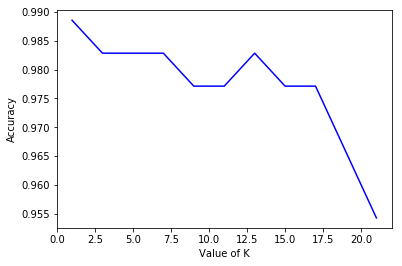

In [14]:
if __name__ == "__main__":
    main()